## Import Dependencies

In [251]:
import re 
import pandas as pd
import requests
from bs4 import BeautifulSoup
import html2text
import stanza
import spacy
from spacy_stanza import StanzaLanguage
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import wordninja

In [347]:


def data_cleaning(data):
    """

    :param data: df['clean_text']
    :return: unlist_clean_text
    """

    # function to remove non-ascii characters
    def _removeNonAscii(s): return "".join(i for i in s if ord(i) < 128)

    data.clean_text = data.clean_text.map(lambda x: _removeNonAscii(x))

    # remove url
    data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'http\S+', '', x))

    # resolve contractions
    data['clean_text'] = data['clean_text'].apply(
        lambda x: [contractions.fix(word) for word in x.split()])
    data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join(x))

    # replace special chars
    data['clean_text'] = data['clean_text'].str.replace("[^a-zA-Z0-9]", " ")

    def lemmatization(texts):
        output = []
        for i in texts:
            s = [token.lemma_ for token in nlp(i)]
            output.append(' '.join(s))
        return output

    data.clean_text = lemmatization(data.clean_text)
    # turn all text' tokens into one single list
    data.clean_text = data.clean_text.str.split()
    unlist_clean_text = [item for items in data.clean_text for item in items]
    return unlist_clean_text

In [349]:
data_cleaning(data)

['just',
 'happen',
 'a',
 'terrible',
 'car',
 'crash',
 '-PRON-',
 'deed',
 'be',
 'the',
 'reason',
 'of',
 'this',
 'earthquake',
 'May',
 'ALLAH',
 'forgive',
 '-PRON-',
 'all',
 'hear',
 'about',
 'earthquake',
 'be',
 'different',
 'city',
 'stay',
 'safe',
 'everyone',
 'there',
 'be',
 'a',
 'forest',
 'fire',
 'at',
 'spot',
 'pond',
 'goose',
 'be',
 'flee',
 'across',
 'the',
 'street',
 '-PRON-',
 'can',
 'not',
 'save',
 '-PRON-',
 'all',
 'forest',
 'fire',
 'near',
 'La',
 'Ronge',
 'Sask',
 'Canada',
 'all',
 'resident',
 'ask',
 'to',
 'shelter',
 'in',
 'place',
 'be',
 'be',
 'notify',
 'by',
 'officer',
 'no',
 'other',
 'evacuation',
 'or',
 'shelter',
 'in',
 'place',
 'order',
 'be',
 'expect',
 '13',
 '000',
 'people',
 'receive',
 'wildfire',
 'evacuation',
 'order',
 'in',
 'California',
 'just',
 'get',
 'send',
 'this',
 'photo',
 'from',
 'Ruby',
 'Alaska',
 'as',
 'smoke',
 'from',
 'wildfire',
 'pour',
 'into',
 'a',
 'school',
 'RockyFire',
 'update',
 

In [348]:
data = pd.read_csv('data - data.csv',memory_map=True)
data = data[['text']]
data['clean_text'] = data.text

In [326]:
#function to remove non-ascii characters
def _removeNonAscii(s): return "".join(i for i in s if ord(i)<128)
#remove non-ascii characters
data.clean_text = data.clean_text.map(lambda x: _removeNonAscii(x))


In [327]:
# remove special characters, numbers, punctuations
import contractions

# data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) )
data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'http\S+', '', x))
data['clean_text'] = data['clean_text'].apply(
    lambda x: [contractions.fix(word) for word in x.split()])


In [328]:
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join(x))

In [329]:
data['clean_text'] = data['clean_text'].str.replace("[^a-zA-Z0-9]", " ")

In [330]:
# data.clean_text = data.clean_text.apply(lambda x: [wordninja.split(word) for word in x.split()])

In [312]:
import spacy
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

In [334]:
%%time
# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output


CPU times: user 23.8 s, sys: 223 ms, total: 24 s
Wall time: 24.5 s


In [338]:
data.clean_text = lemmatization(data.clean_text)

In [342]:
data.clean_text

0                         just happen a terrible car crash
1        -pron- deed be the reason of this    earthquak...
2        hear about    earthquake be different city    ...
3        there be a forest fire at spot pond    goose b...
4                 forest fire near La Ronge Sask    Canada
                               ...                        
10871       M1 94    01 04 UTC    5 km S of Volcano Hawaii
10872    Police investigate after an e bike collide wit...
10873    the late    More home raze by Northern Califor...
10874           MEG issue Hazardous Weather Outlook    HWO
10875       CityofCalgary have activate -PRON- municipa...
Name: clean_text, Length: 10876, dtype: object

In [339]:
#turn all comments' tokens into one single list
# data.clean_text  = data.clean_text.apply(lambda x: x.split())
unlist_comments = [item for items in data.clean_text for item in items]

In [341]:
unlist_comments


['j',
 'u',
 's',
 't',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'e',
 'n',
 ' ',
 'a',
 ' ',
 't',
 'e',
 'r',
 'r',
 'i',
 'b',
 'l',
 'e',
 ' ',
 'c',
 'a',
 'r',
 ' ',
 'c',
 'r',
 'a',
 's',
 'h',
 '-',
 'p',
 'r',
 'o',
 'n',
 '-',
 ' ',
 'd',
 'e',
 'e',
 'd',
 ' ',
 'b',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'r',
 'e',
 'a',
 's',
 'o',
 'n',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'a',
 'r',
 't',
 'h',
 'q',
 'u',
 'a',
 'k',
 'e',
 ' ',
 'M',
 'a',
 'y',
 ' ',
 'A',
 'L',
 'L',
 'A',
 'H',
 ' ',
 'f',
 'o',
 'r',
 'g',
 'i',
 'v',
 'e',
 ' ',
 '-',
 'p',
 'r',
 'o',
 'n',
 '-',
 ' ',
 'a',
 'l',
 'l',
 'h',
 'e',
 'a',
 'r',
 ' ',
 'a',
 'b',
 'o',
 'u',
 't',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'a',
 'r',
 't',
 'h',
 'q',
 'u',
 'a',
 'k',
 'e',
 ' ',
 'b',
 'e',
 ' ',
 'd',
 'i',
 'f',
 'f',
 'e',
 'r',
 'e',
 'n',
 't',
 ' ',
 'c',
 'i',
 't',
 'y',
 ' ',
 ' ',
 ' ',
 ' ',
 's',
 't',
 'a',
 'y',
 ' ',
 's',
 'a',
 'f',
 'e',
 ' ',
 'e',
 'v',
 'e'

> We will then use NLTK’s tools to generate all possible bigrams and trigrams

In [158]:
import nltk
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(unlist_comments)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(unlist_comments)

## Methods to Rank Collocations

### Counting frequencies of adjacent words with part of speech filters:

In [221]:
bigram_freq = bigramFinder.ngram_fd.items()

In [222]:
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

In [225]:
bigramFreqTable.reset_index(drop=True)

,bigram,freq
0,"(-PRON-, be)",1552
1,"(in, the)",430
2,"(do, not)",405
3,"(be, a)",391
4,"(of, the)",375
...,...,...
662,"(Wildfire, ABC)",20
663,"(s, and)",20
664,"(keep, -PRON-)",20
665,"(-PRON-, friend)",20


In [162]:
bigramFreqTable[:10]

,bigram,freq
149,"(-PRON-, be)",1552
166,"(in, the)",430
298,"(do, not)",405
29,"(be, a)",391
158,"(of, the)",375
231,"(-PRON-, have)",361
161,"(and, -PRON-)",329
1243,"(be, not)",229
297,"(-PRON-, do)",227
452,"(-PRON-, will)",226


In [163]:
### issue with this is adjacent spaces, stop words, articles, prepositions or pronouns are common and are not meaningful
### To fix this, we filter out for collocations not containing stop words and filter for only the following structures:
### Bigrams: (Noun, Noun), (Adjective, Noun)
### Trigrams: (Adjective/Noun, Anything, Adjective/Noun)
### This is a common structure used in literature and generally works well.

In [164]:
en_stopwords = set(stopwords.words('english'))
#function to filter for ADJ/NN bigrams
def rightTypes(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords:
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

In [165]:
filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]

In [166]:
filtered_bi[:10]

,bigram,freq
621,"(-PRON-, -PRON-)",155
3282,"(-PRON-, think)",83
13904,"(suicide, bomber)",79
1395,"(-PRON-, feel)",73
2126,"(think, -PRON-)",72
4155,"(YouTube, video)",62
17538,"(burn, building)",57
646,"(-PRON-, S)",57
5590,"(Northern, California)",54
20523,"(tis, ed)",50


In [167]:

trigram_freq = trigramFinder.ngram_fd.items()

In [168]:
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [227]:
trigramFreqTable.head().reset_index(drop=True)

,trigram,freq
0,"(-PRON-, do, not)",157
1,"(-PRON-, be, a)",108
2,"(be, go, to)",102
3,"(-PRON-, be, not)",99
4,"(-PRON-, can, not)",93


In [170]:
trigramFreqTable[:10]

,trigram,freq
311,"(-PRON-, do, not)",157
5017,"(-PRON-, be, a)",108
1530,"(be, go, to)",102
1902,"(-PRON-, be, not)",99
42,"(-PRON-, can, not)",93
2634,"(and, -PRON-, be)",91
1529,"(-PRON-, be, go)",75
4839,"(-PRON-, like, a)",67
4840,"(like, a, YouTube)",61
4841,"(a, YouTube, video)",61


In [171]:
def rightTypesTri(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or '  ' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords:
            return False
    first_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    third_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in first_type and tags[2][1] in third_type:
        return True
    else:
        return False

In [172]:
filtered_tri = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypesTri(x))]

In [173]:
filtered_tri[:10]

,trigram,freq
25909,"(trauma, tis, ed)",50
114177,"(PKK, suicide, bomber)",42
114176,"(old, PKK, suicide)",41
80974,"(pre, break, good)",41
41511,"(MH, 370, Malaysia)",36
114193,"(Turkey, Army, trench)",34
105973,"(airport, get, swallow)",34
51413,"(Obama, declare, disaster)",32
114194,"(Army, trench, release)",32
100088,"(Quarantine, Offensive, Content)",28


## PMI 
### The main intuition is that it measures how much more likely the words co-occur than if they were independent.

In [174]:
freq_bi = filtered_bi[:20].bigram.values

In [175]:
freq_tri = filtered_tri[:20].trigram.values

In [176]:
bigramFinder.apply_freq_filter(20)

In [177]:
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)

In [178]:
bigramPMITable[:10]

,bigram,PMI
0,"(Madhya, Pradesh)",12.963405
1,"(GB, BO)",12.963405
2,"(Pamela, Geller)",12.899275
3,"(Virgin, galactic)",12.577347
4,"(Temple, Mount)",12.529752
5,"(Quarantine, Offensive)",12.515946
6,"(Offensive, Content)",12.468640
7,"(Fun, tenn)",12.422837
8,"(Stock, Market)",12.280926
9,"(recount, horror)",12.137435


In [179]:
trigramFinder.apply_freq_filter(20)

In [180]:
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)

In [230]:
trigramPMITable[:25]

,trigram,PMI
0,"(Quarantine, Offensive, Content)",24.984587
1,"(anthrax, lab, mishap)",24.637439
2,"(Stock, Market, Crash)",24.031338
3,"(Salt, River, Wild)",23.896408
4,"(River, Wild, Horse)",23.740289
5,"(Turkey, Army, trench)",23.144749
6,"(Malaysia, PM, Investigators)",22.965325
7,"(hot, Fun, tenn)",22.943600
8,"(horrible, sub, reddit)",22.914535
9,"(wreckage, conclusively, confirm)",22.860673


In [182]:
pmi_bi = bigramPMITable[:20].bigram.values
pmi_tri = trigramPMITable[:20].trigram.values

## T-test

In [183]:
bigramTtable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram','t']).sort_values(by='t', ascending=False)

In [184]:
bigramTtable.head()

,bigram,t
0,"(-PRON-, be)",31.899863
1,"(do, not)",19.809452
2,"(in, the)",16.646294
3,"(of, the)",15.552997
4,"(-PRON-, have)",15.458100


In [185]:
filteredT_bi = bigramTtable[bigramTtable.bigram.map(lambda x: rightTypes(x))]

In [186]:
filteredT_bi[:10]

,bigram,t
31,"(suicide, bomber)",8.879703
42,"(-PRON-, think)",7.930487
44,"(YouTube, video)",7.854063
46,"(-PRON-, feel)",7.690244
52,"(burn, building)",7.517279
55,"(Northern, California)",7.338377
59,"(think, -PRON-)",7.218402
62,"(tis, ed)",7.068331
63,"(trauma, tis)",7.067245
72,"(Full, read)",6.919996


In [187]:
trigramTtable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.student_t)), columns=['trigram','t']).sort_values(by='t', ascending=False)

In [188]:
trigramTtable.head()

,trigram,t
0,"(-PRON-, do, not)",12.502202
1,"(be, go, to)",10.072797
2,"(-PRON-, be, a)",9.795103
3,"(-PRON-, be, not)",9.742800
4,"(-PRON-, can, not)",9.628492


In [189]:
filteredT_tri = trigramTtable[trigramTtable.trigram.map(lambda x: rightTypesTri(x))]

In [190]:
filteredT_tri.head(10)

,trigram,t
13,"(trauma, tis, ed)",7.071066
20,"(PKK, suicide, bomber)",6.480738
26,"(old, PKK, suicide)",6.403120
27,"(pre, break, good)",6.403113
38,"(MH, 370, Malaysia)",5.999996
42,"(Turkey, Army, trench)",5.830951
45,"(airport, get, swallow)",5.830945
71,"(Army, trench, release)",5.656853
75,"(Obama, declare, disaster)",5.656850
95,"(Quarantine, Offensive, Content)",5.291502


In [191]:

t_bi = filteredT_bi[:20].bigram.values

In [192]:
t_tri = filteredT_tri[:20].trigram.values

## Chi-Square
###  The chi-square test assumes in the null hypothesis that words are independent, just like in t-test.

In [193]:
bigramChiTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.chi_sq)), columns=['bigram','chi-sq']).sort_values(by='chi-sq', ascending=False)

In [194]:
bigramChiTable.head(20)

,bigram,chi-sq
0,"(Madhya, Pradesh)",175710.000000
1,"(GB, BO)",167722.227159
2,"(Quarantine, Offensive)",163994.133036
3,"(Pamela, Geller)",160429.043260
4,"(Offensive, Content)",158703.096342
5,"(MH, 370)",152422.109417
6,"(Fun, tenn)",142759.499279
7,"(Stock, Market)",129382.852949
8,"(tis, ed)",129185.290350
9,"(Temple, Mount)",124172.999145


In [195]:
trigramChiTable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.chi_sq)), columns=['trigram','chi-sq']).sort_values(by='chi-sq', ascending=False)

In [196]:
trigramChiTable.head(20)

,trigram,chi-sq
0,"(Quarantine, Offensive, Content)",9.295399e+08
1,"(anthrax, lab, mishap)",6.263536e+08
2,"(Stock, Market, Crash)",4.457864e+08
3,"(Salt, River, Wild)",4.059841e+08
4,"(Turkey, Army, trench)",3.153136e+08
5,"(River, Wild, Horse)",2.802685e+08
6,"(wreckage, conclusively, confirm)",2.513403e+08
7,"(trauma, tis, ed)",2.389629e+08
8,"(hot, Fun, tenn)",2.016751e+08
9,"(Malaysia, PM, Investigators)",1.965492e+08


In [197]:
chi_bi = bigramChiTable[:20].bigram.values

In [198]:
chi_tri = trigramChiTable[:20].trigram.values

In [199]:
bigramLikTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.likelihood_ratio)), columns=['bigram','likelihood ratio']).sort_values(by='likelihood ratio', ascending=False)

In [200]:
bigramLikTable.head()

,bigram,likelihood ratio
0,"(-PRON-, be)",3163.770741
1,"(do, not)",2927.755745
2,"(MH, 370)",1517.501582
3,"(can, not)",1190.329246
4,"(suicide, bomber)",1107.134222


In [201]:

filteredLik_bi = bigramLikTable[bigramLikTable.bigram.map(lambda x: rightTypes(x))]

In [202]:
filteredLik_bi.head(10)

,bigram,likelihood ratio
4,"(suicide, bomber)",1107.134222
6,"(tis, ed)",837.845125
10,"(trauma, tis)",785.007804
17,"(YouTube, video)",674.196210
19,"(Northern, California)",671.968048
20,"(Cross, Body)",664.626077
23,"(mass, murderer)",620.140891
24,"(loud, bang)",614.354159
25,"(Full, read)",606.962473
27,"(mass, murder)",596.386279


In [203]:
trigramLikTable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.likelihood_ratio)), columns=['trigram','likelihood ratio']).sort_values(by='likelihood ratio', ascending=False)

In [204]:
trigramLikTable.head()

,trigram,likelihood ratio
0,"(-PRON-, be, not)",6830.205838
1,"(-PRON-, do, not)",6075.703805
2,"(if, -PRON-, be)",6022.415118
3,"(when, -PRON-, be)",5758.108735
4,"(-PRON-, be, a)",5572.981828


In [205]:
filteredLik_tri = trigramLikTable[trigramLikTable.trigram.map(lambda x: rightTypesTri(x))]

In [206]:
filteredLik_tri.head(20)

,trigram,likelihood ratio
33,"(MH, 370, Malaysia)",2995.523069
36,"(PKK, suicide, bomber)",2625.816507
37,"(trauma, tis, ed)",2434.293229
49,"(Obama, declare, disaster)",1767.823010
50,"(old, PKK, suicide)",1765.820099
51,"(Turkey, Army, trench)",1714.724621
57,"(Cross, Body, Bag)",1624.771643
62,"(pre, break, good)",1596.264121
63,"(Quarantine, Offensive, Content)",1585.431687
64,"(Obama, sign, disaster)",1551.781748


In [207]:

lik_bi = filteredLik_bi[:20].bigram.values

In [208]:
lik_tri = filteredLik_tri[:20].trigram.values

In [209]:
bigramsCompare = pd.DataFrame([freq_bi, pmi_bi, t_bi, chi_bi, lik_bi]).T

In [210]:
bigramsCompare.columns = ['Frequency With Filter', 'PMI', 'T-test With Filter', 'Chi-Sq Test', 'Likeihood Ratio Test With Filter']

In [211]:
bigramsCompare

,Frequency With Filter,PMI,T-test With Filter,Chi-Sq Test,Likeihood Ratio Test With Filter
0,"(-PRON-, -PRON-)","(Madhya, Pradesh)","(suicide, bomber)","(Madhya, Pradesh)","(suicide, bomber)"
1,"(-PRON-, think)","(GB, BO)","(-PRON-, think)","(GB, BO)","(tis, ed)"
2,"(suicide, bomber)","(Pamela, Geller)","(YouTube, video)","(Quarantine, Offensive)","(trauma, tis)"
3,"(-PRON-, feel)","(Virgin, galactic)","(-PRON-, feel)","(Pamela, Geller)","(YouTube, video)"
4,"(think, -PRON-)","(Temple, Mount)","(burn, building)","(Offensive, Content)","(Northern, California)"
5,"(YouTube, video)","(Quarantine, Offensive)","(Northern, California)","(MH, 370)","(Cross, Body)"
6,"(burn, building)","(Offensive, Content)","(think, -PRON-)","(Fun, tenn)","(mass, murderer)"
7,"(-PRON-, S)","(Fun, tenn)","(tis, ed)","(Stock, Market)","(loud, bang)"
8,"(Northern, California)","(Stock, Market)","(trauma, tis)","(tis, ed)","(Full, read)"
9,"(tis, ed)","(recount, horror)","(Full, read)","(Temple, Mount)","(mass, murder)"


In [212]:
trigramsCompare = pd.DataFrame([freq_tri, pmi_tri, t_tri, chi_tri, lik_tri]).T

In [232]:
trigramsCompare.columns = ['Frequency With Filter', 'PMI', 'T-test With Filter', 'Chi-Sq Test', 'Likelihood Ratio Test With Filter']

In [233]:
trigramsCompare

,Frequency With Filter,PMI,T-test With Filter,Chi-Sq Test,Likelihood Ratio Test With Filter
0,"(trauma, tis, ed)","(Quarantine, Offensive, Content)","(trauma, tis, ed)","(Quarantine, Offensive, Content)","(MH, 370, Malaysia)"
1,"(PKK, suicide, bomber)","(anthrax, lab, mishap)","(PKK, suicide, bomber)","(anthrax, lab, mishap)","(PKK, suicide, bomber)"
2,"(old, PKK, suicide)","(Stock, Market, Crash)","(old, PKK, suicide)","(Stock, Market, Crash)","(trauma, tis, ed)"
3,"(pre, break, good)","(Salt, River, Wild)","(pre, break, good)","(Salt, River, Wild)","(Obama, declare, disaster)"
4,"(MH, 370, Malaysia)","(River, Wild, Horse)","(MH, 370, Malaysia)","(Turkey, Army, trench)","(old, PKK, suicide)"
5,"(Turkey, Army, trench)","(Turkey, Army, trench)","(Turkey, Army, trench)","(River, Wild, Horse)","(Turkey, Army, trench)"
6,"(airport, get, swallow)","(Malaysia, PM, Investigators)","(airport, get, swallow)","(wreckage, conclusively, confirm)","(Cross, Body, Bag)"
7,"(Obama, declare, disaster)","(hot, Fun, tenn)","(Army, trench, release)","(trauma, tis, ed)","(pre, break, good)"
8,"(Army, trench, release)","(horrible, sub, reddit)","(Obama, declare, disaster)","(hot, Fun, tenn)","(Quarantine, Offensive, Content)"
9,"(Quarantine, Offensive, Content)","(wreckage, conclusively, confirm)","(Quarantine, Offensive, Content)","(Malaysia, PM, Investigators)","(Obama, sign, disaster)"


In [247]:
COL_ORDER = ['PMI', 'Chi-Sq Test','Likelihood Ratio Test With Filter', 'T-test With Filter', 'Frequency With Filter']
from ordered_set import OrderedSet
trigram_set = OrderedSet()
for col in COL_ORDER:
    [trigram_set.add(x) for x in trigramsCompare[col].values]

In [250]:
[' '.join(x) for x in list(trigram_set)][:20]

['Quarantine Offensive Content',
 'anthrax lab mishap',
 'Stock Market Crash',
 'Salt River Wild',
 'River Wild Horse',
 'Turkey Army trench',
 'Malaysia PM Investigators',
 'hot Fun tenn',
 'horrible sub reddit',
 'wreckage conclusively confirm',
 'wave israeli Flag',
 'bio terror germ',
 'Typhoon devastate Saipan',
 'Legionnaires di sea',
 'loud bang nearby',
 'Cross Body Bag',
 'transport bio terror',
 'trauma tis ed',
 'Army trench release',
 'via Pamela Geller']

## LDA

In [100]:
from gensim import models,corpora
import spacy
import gensim

nlp = spacy.load('en_core_web_lg')

In [92]:
data.clean_text = data.clean_text.apply(lambda x: ' '.join(x)) 

In [93]:
def clean_up(text):
    removal=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']
    text_out = []
    doc= nlp(text)
    for token in doc:
        if token.is_stop == False and token.is_alpha and len(token)>2 and token.pos_ not in removal:
            lemma = token.lemma_
            text_out.append(lemma)
    return text_out
    
datalist = data.clean_text.apply(lambda x:clean_up(x))

In [94]:
"""Step-2: Create a vocabulary for the lda model and 
convert our corpus into document-term matrix for Lda"""

dictionary = corpora.Dictionary(datalist)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in datalist]

In [96]:
num_topics =12
Lda = models.LdaMulticore
lda= Lda(doc_term_matrix, num_topics=num_topics,id2word = dictionary, 
         passes=20,chunksize=2000,random_state=3)

## Optimize # of k topics

In [102]:
coherence = []
for k in range(1,20):
    print('Round: '+str(k))
    Lda = models.LdaMulticore
    ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=20, iterations=100,  chunksize = 10000, eval_every = 10)
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=datalist, dictionary=dictionary, coherence='c_v')
    coherence.append((k,cm.get_coherence()))

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19


In [103]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

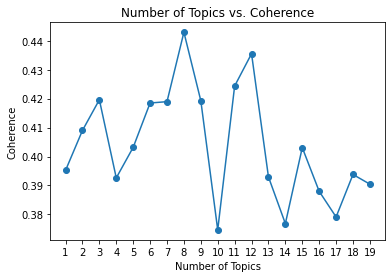

In [105]:
import matplotlib.pyplot as plt 
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [107]:
num_topics = 8
Lda = models.LdaMulticore
lda = Lda(doc_term_matrix,
          num_topics=8,
          id2word=dictionary,
          passes=20,
          iterations=100,
          chunksize=10000,
          eval_every=10)

In [110]:
# To show initial topics
ldamodel.show_topics(20, num_words=3, formatted=False)

[(0,
  [('family', 0.021217275),
   ('trauma', 0.016821902),
   ('Legionnaires', 0.014675365)]),
 (1,
  [('attack', 0.010847572), ('Cross', 0.0074977954), ('year', 0.0068877037)]),
 (2,
  [('watch', 0.015866857),
   ('minute', 0.009972806),
   ('Sandstorm', 0.008756292)]),
 (3, [('amp', 0.0117374845), ('flood', 0.01093171), ('burn', 0.010362984)]),
 (4, [('big', 0.013103691), ('fire', 0.011035893), ('video', 0.010830956)]),
 (5,
  [('failure', 0.012871226),
   ('police', 0.010970405),
   ('structural', 0.01073114)]),
 (6, [('find', 0.0088292295), ('fire', 0.008627786), ('debris', 0.008326791)]),
 (7, [('fire', 0.02841567), ('train', 0.012991575), ('wild', 0.0076290234)]),
 (8,
  [('school', 0.009159652), ('injure', 0.008432267), ('break', 0.0076640723)]),
 (9, [('like', 0.007980102), ('burn', 0.007894871), ('amp', 0.0069337036)]),
 (10, [('man', 0.0098942015), ('charge', 0.009200013), ('amp', 0.008738931)]),
 (11,
  [('disaster', 0.02357801),
   ('California', 0.016677883),
   ('Obama'

In [114]:
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
topic_data =  pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'tsne')
pyLDAvis.display(topic_data)

In [139]:

all_topics = {}
lambd = 0.5  # Adjust this accordingly
for i in range(1,8): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)]
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:20].values

/Users/subir/pythonenv/default/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [140]:
all_topics['Topic 1']

array(['panic', 'loud', 'bang', 'hear', 'appear', 'neighbour', 'news',
       'blast', 'unconfirmed', 'phone', 'Trent', 'wind', 'time',
       'politic', 'Australia', 'Bridge', 'collapse', 'Breaking', 'stab',
       'emergency'], dtype=object)

In [143]:
pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Topic 1,panic,loud,bang,hear,appear,neighbour,news,blast,unconfirmed,phone,Trent,wind,time,politic,Australia,Bridge,collapse,Breaking,stab,emergency
Topic 2,fire,train,tragedy,wild,Market,Crash,Stock,China,gem,pile,outrage,recount,pay,colour,shape,Rly,plunge,crematorium,provoke,business
Topic 3,school,injure,computer,datum,sound,Baby,send,tenn,Fun,hijacking,Patience,Hat,deliver,pandemonium,Aba,APC,bridge,bus,Bayelsa,Jonathan
Topic 4,crush,love,feel,girl,quiz,Hollywood,Chile,ball,image,movie,feminist,like,low,try,want,obliterate,miner,trap,Movie,zone
Topic 5,terrorism,Hiroshima,Nuclear,mark,atomic,Truth,rainstorm,BBC,Japan,lie,anniversary,CNN,natural,Train,Outlook,News,god,year,Hazardous,Islam
Topic 6,ambulance,flood,Hellfire,helicopter,drought,thunder,hurricane,burn,let,warn,use,learn,pakistani,kill,flame,run,Myanmar,amp,issue,lead
Topic 7,suicide,bomber,bomb,mosque,PKK,Turkey,saudi,kill,detonate,ija,trench,site,old,wreckage,murderer,confirm,mass,bombing,Reuters,Investigators
